## Data/MC Comparison for Brem-Induced Clusters

#### Comparison of Clusters in Data vs MC. This is to validate the signal reconstruction process. We compare cluster from Z->MuMu events in Data vs those from a DY->ZMuMu (50-120 GeV for MLL). Both Data and MC are from 2023B, with an initial DBSCAN skim applied

In [1]:
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"../")
import mplhep as hep
import pickle
import glob
import ROOT as rt
import coffea
import awkward as ak
from coffea import hist, processor
from coffea.nanoevents.methods import candidate
from coffea.nanoevents.methods import vector


Welcome to JupyROOT 6.28/00


In [2]:
#paths
data_path = "/uscms/home/amalbert/nobackup/CMSSW_10_6_20/src/run3_llp_analyzer/testNewFilters_Run2023B_goodLumi.root"
#MC_path = "/eos/uscms/store/group/lpclonglived/amalbert/Data_MC_Comp_TnP/MCSummer23_DY50to120_postBPix_newestTnP_Output_617pb_weighted.root"


In [3]:
data_TFile = rt.TFile(data_path)
#MC_TFile = rt.TFile(MC_path)

data_tree = data_TFile.Get("MuonSystem")
#MC_tree = MC_TFile.Get("MuonSystem")

Error in <TList::Clear>: A list is accessing an object (0xcee4810) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x12da9070) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x12dbd740) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x12dbdab0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x12dbde20) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x12dbe190) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x12dbe6c0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x12ddb010) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x12de2820) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x12de2bf

In [4]:
data_tree.GetEntries()

35233

In [33]:
data_tree.Print("*Flag*")

******************************************************************************
*Tree    :MuonSystem: MuonSystem                                             *
*Entries :    62608 : Total =        79408340 bytes  File  Size =   21548374 *
*        :          : Tree compression factor =   3.68                       *
******************************************************************************
*Br    0 :Flag_HBHENoiseFilter : Flag_HBHENoiseFilter/O                      *
*Entries :    62608 : Total  Size=      63341 bytes  File Size  =        524 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression= 119.84     *
*............................................................................*
*Br    1 :Flag_BadPFMuonFilter : Flag_BadPFMuonFilter/O                      *
*Entries :    62608 : Total  Size=      63341 bytes  File Size  =        662 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=  94.85     *
*...................................................

In [ ]:
MC_tree.Scan("cscRechitCluster_matchToProbeMuon")

In [ ]:
MC_tree.GetEntries()*0.47

In [ ]:
EraBCount = 0
for entry in data_tree:
    if getattr(data_tree, "runNum") <= 367079:
        EraBCount+=1
EraBCount

### ZMass Comparison of Selected Events

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack = rt.THStack("stack","Z Candidate Mass Comparison")
data_ZMass = rt.TH1F("ZMass_Data", "Z Mass Distribution for Data", nbinsx=80, xlow = 40, xup=120)
data_tree.Project("ZMass_Data", "ZMass")
data_ZMass.SetLineColor(rt.kRed)
#data_ZMass.Scale(1/data_ZMass.GetEntries())
stack.Add(data_ZMass)


MC_ZMass = rt.TH1F("ZMass_MC", "Z Mass Distribution for MC", nbinsx=80, xlow = 40, xup=120)
MC_tree.Project("ZMass_MC", "ZMass")
MC_ZMass.SetLineColor(rt.kBlue)
#MC_ZMass.Scale(1/MC_ZMass.GetEntries())
stack.Add(MC_ZMass)

stack.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_ZMass, "Data")
legend.AddEntry(MC_ZMass, "MC")
legend.Draw()

stack.GetXaxis().SetTitle("M_{ll} [GeV]");
stack.GetYaxis().SetTitle("Fraction of Events");

c.Draw()

### Pt Comparison

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_leading = rt.THStack("stack","Leading Muon Pt Comparison")
data_LeadingPt = rt.TH1F("LeadingPt_Data", "Leading Muon Pt Distribution for Data", nbinsx=80, xlow = 0, xup=120)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    data_LeadingPt.Fill(getattr(data_tree, "lepPt")[0])
data_LeadingPt.SetLineColor(rt.kRed)
#data_LeadingPt.Scale(1/data_LeadingPt.GetEntries())
stack_leading.Add(data_LeadingPt)


MC_LeadingPt = rt.TH1F("LeadingPt_MC", "Leading Muon Pt Distribution for MC", nbinsx=80, xlow = 0, xup=120)
#MC_LeadingPt.Project("LeadingPt_MC", "LeadingMC")
for entry in MC_tree:
    MC_LeadingPt.Fill(getattr(MC_tree, "lepPt")[0], getattr(MC_tree, "weight"))
MC_LeadingPt.SetLineColor(rt.kBlue)
#MC_LeadingPt.Scale(1/MC_LeadingPt.GetEntries())
stack_leading.Add(MC_LeadingPt)

stack_leading.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_LeadingPt, "Data")
legend.AddEntry(MC_LeadingPt, "MC")
legend.Draw()

stack_leading.GetXaxis().SetTitle("Leading Muon pT [GeV]");
stack_leading.GetYaxis().SetTitle("Events");

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_leading = rt.THStack("stack","Z Candidate Mass")
data_LeadingPt = rt.TH1F("LeadingPt_Data", "Leading Muon Pt Distribution for Data", nbinsx=80, xlow = 0, xup=150)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    data_LeadingPt.Fill(getattr(data_tree, "ZMass"))
data_LeadingPt.SetLineColor(rt.kRed)
#data_LeadingPt.Scale(1/data_LeadingPt.GetEntries())
stack_leading.Add(data_LeadingPt)


MC_LeadingPt = rt.TH1F("LeadingPt_MC", "Leading Muon Pt Distribution for MC", nbinsx=80, xlow = 0, xup=150)
#MC_LeadingPt.Project("LeadingPt_MC", "LeadingMC")
for entry in MC_tree:
    MC_LeadingPt.Fill(getattr(MC_tree, "ZMass"), getattr(MC_tree, "weight"))
MC_LeadingPt.SetLineColor(rt.kBlue)
#MC_LeadingPt.Scale(1/MC_LeadingPt.GetEntries())
stack_leading.Add(MC_LeadingPt)

stack_leading.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_LeadingPt, "Data")
legend.AddEntry(MC_LeadingPt, "MC")
legend.Draw()

stack_leading.GetXaxis().SetTitle("Z Candidate Mass [GeV]");
stack_leading.GetYaxis().SetTitle("Events");

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_SubleadingPt = rt.THStack("stack","Subleading Muon Pt Comparison")
data_SubleadingPt = rt.TH1F("SubleadingPt_Data", "Subleading Muon Pt Distribution for Data", nbinsx=80, xlow = 0, xup=120)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    data_SubleadingPt.Fill(getattr(data_tree, "lepPt")[1])
data_SubleadingPt.SetLineColor(rt.kRed)
#data_SubleadingPt.Scale(1/data_SubleadingPt.GetEntries())
stack_SubleadingPt.Add(data_SubleadingPt)


MC_SubleadingPt = rt.TH1F("SubleadingPt_MC", "Subleading Muon Pt Distribution for MC", nbinsx=80, xlow = 0, xup=120)
#MC_LeadingPt.Project("LeadingPt_MC", "LeadingMC")
for entry in MC_tree:
    MC_SubleadingPt.Fill(getattr(MC_tree, "lepPt")[1], getattr(MC_tree, "weight"))
MC_SubleadingPt.SetLineColor(rt.kBlue)
#MC_SubleadingPt.Scale(1/MC_SubleadingPt.GetEntries())
stack_SubleadingPt.Add(MC_SubleadingPt)

stack_SubleadingPt.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_SubleadingPt, "Data", "lep")
legend.AddEntry(MC_SubleadingPt, "MC", "lep")
legend.Draw()

stack_SubleadingPt.GetXaxis().SetTitle("Subleading Muon pT [GeV]");
stack_SubleadingPt.GetYaxis().SetTitle("Events");

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_clusterSize = rt.THStack("stack","Number of Muons in Event Passing Tag Criteria")
data_clusterSize = rt.TH1F("ClusterSize_Data", "Cluster Size Distribution for Data", nbinsx=4, xlow = 0, xup=4)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    counter=0
    for i in range(data_tree.nLeptons):
        if data_tree.lepTag[i]==1:
            counter+=1
    data_clusterSize.Fill(counter)
data_clusterSize.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_clusterSize.Add(data_clusterSize)


MC_clusterSize = rt.TH1F("ClusterSize_MC", "Cluster Size Distribution for MC", nbinsx=4, xlow = 0, xup=4)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in MC_tree:
    counter=0
    for i in range(MC_tree.nLeptons):
        if data_tree.lepTag[i]==1:
            counter+=1
    MC_clusterSize.Fill(counter, getattr(MC_tree, "weight"))
MC_clusterSize.SetLineColor(rt.kBlue)
#MC_clusterSize.Scale(1/MC_clusterSize.GetEntries())
stack_clusterSize.Add(MC_clusterSize)

stack_clusterSize.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_clusterSize, "Data")
legend.AddEntry(MC_clusterSize, "MC")
legend.Draw()

stack_clusterSize.GetXaxis().SetTitle("Number of Tag Muons");
stack_clusterSize.GetYaxis().SetTitle("Events");
#c.SetLogy();
c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_SubleadingPt = rt.THStack("stack","Tag Muon Pt Comparison")
data_SubleadingPt = rt.TH1F("SubleadingPt_Data", "Subleading Muon Pt Distribution for Data", nbinsx=80, xlow = 0, xup=120)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    for i in range(data_tree.nLeptons):
        if data_tree.lepTag[i]==1:
            data_SubleadingPt.Fill(getattr(data_tree, "lepPt")[i])
data_SubleadingPt.SetLineColor(rt.kRed)
#data_SubleadingPt.Scale(1/data_SubleadingPt.GetEntries())
stack_SubleadingPt.Add(data_SubleadingPt)


MC_SubleadingPt = rt.TH1F("SubleadingPt_MC", "Subleading Muon Pt Distribution for MC", nbinsx=80, xlow = 0, xup=120)
#MC_LeadingPt.Project("LeadingPt_MC", "LeadingMC")
for entry in MC_tree:
    for i in range(MC_tree.nLeptons):
        if MC_tree.lepTag[i]==1:
            MC_SubleadingPt.Fill(getattr(MC_tree, "lepPt")[i], MC_tree.weight)
MC_SubleadingPt.SetLineColor(rt.kBlue)
#MC_SubleadingPt.Scale(1/MC_SubleadingPt.GetEntries())
stack_SubleadingPt.Add(MC_SubleadingPt)

stack_SubleadingPt.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_SubleadingPt, "Data", "lep")
legend.AddEntry(MC_SubleadingPt, "MC", "lep")
legend.Draw()

stack_SubleadingPt.GetXaxis().SetTitle("Tag Muon pT [GeV]");
stack_SubleadingPt.GetYaxis().SetTitle("Events");

c.Draw()

### Eta of All Muons

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_eta = rt.THStack("stack","Muon Eta Comparison")
data_eta = rt.TH1F("Eta_Data", "Eta Distribution for Data", nbinsx=40, xlow = -4, xup=4)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    data_eta.Fill(getattr(data_tree, "lepEta")[0])
    data_eta.Fill(getattr(data_tree, "lepEta")[1])
data_eta.SetLineColor(rt.kRed)
data_eta.Scale(1/data_eta.GetEntries())
stack_eta.Add(data_eta)


MC_eta = rt.TH1F("Eta", "Eta Distribution for MC", nbinsx=40, xlow = -4, xup=4)
#MC_LeadingPt.Project("LeadingPt_MC", "LeadingMC")
for entry in MC_tree:
    MC_eta.Fill(getattr(MC_tree, "lepEta")[0])
    MC_eta.Fill(getattr(MC_tree, "lepEta")[1])
MC_eta.SetLineColor(rt.kBlue)
MC_eta.Scale(1/MC_eta.GetEntries())
stack_eta.Add(MC_eta)

stack_eta.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_eta, "Data")
legend.AddEntry(MC_eta, "MC")
legend.Draw()

stack_eta.GetXaxis().SetTitle("Muon Eta [GeV]");
stack_eta.GetYaxis().SetTitle("Fraction of Events");

c.Draw()

### Phi

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_phi = rt.THStack("stack","Muon Phi Comparison")
data_phi = rt.TH1F("Phi_Data", "Phi Distribution for Data", nbinsx=40, xlow = -4, xup=4)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    data_phi.Fill(getattr(data_tree, "lepPhi")[0])
    data_phi.Fill(getattr(data_tree, "lepPhi")[1])
data_phi.SetLineColor(rt.kRed)
data_phi.Scale(1/data_phi.GetEntries())
stack_phi.Add(data_phi)


MC_phi= rt.TH1F("Eta", "Eta Distribution for MC", nbinsx=40, xlow = -4, xup=4)
#MC_LeadingPt.Project("LeadingPt_MC", "LeadingMC")
for entry in MC_tree:
    MC_phi.Fill(getattr(MC_tree, "lepPhi")[0])
    MC_phi.Fill(getattr(MC_tree, "lepPhi")[1])
MC_phi.SetLineColor(rt.kBlue)
MC_phi.Scale(1/MC_phi.GetEntries())
stack_phi.Add(MC_phi)

stack_phi.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_phi, "Data")
legend.AddEntry(MC_phi, "MC")
legend.Draw()

stack_phi.GetXaxis().SetTitle("Muon Phi [GeV]");
stack_phi.GetYaxis().SetTitle("Fraction of Events");

c.Draw()

### Properties of Muons Matched to Clusters

In [5]:
def deltaR(eta1, phi1, eta2, phi2):
    return np.sqrt((eta1-eta2)**2+(phi1-phi2)**2)

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_leading = rt.THStack("stack","Pt of Muon Matched to Cluster")
data_LeadingPt = rt.TH1F("LeadingPt_Data", "Leading Muon Pt Distribution for Data", nbinsx=80, xlow = 0, xup=120)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
data_cluster_count = 0
for entry in data_tree:
    for i in range(data_tree.nCscRechitClusters):
        if not (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i]):
            continue
        for j in range(data_tree.nLeptons):
            if deltaR(data_tree.lepEta[j],data_tree.lepPhi[j], data_tree.cscRechitClusterEta[i],data_tree.cscRechitClusterPhi[i])<0.4:
                data_LeadingPt.Fill(data_tree.lepPt[j])
                data_cluster_count+=1
data_LeadingPt.SetLineColor(rt.kRed)
#data_LeadingPt.Scale(1/data_LeadingPt.GetEntries())
stack_leading.Add(data_LeadingPt)
print(data_cluster_count)

MC_cluster_count=0
MC_LeadingPt = rt.TH1F("LeadingPt_MC", "Leading Muon Pt Distribution for MC", nbinsx=80, xlow = 0, xup=120)
#MC_LeadingPt.Project("LeadingPt_MC", "LeadingMC")
for entry in MC_tree:
    for i in range(MC_tree.nCscRechitClusters):
        if not (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            continue
        for j in range(MC_tree.nLeptons):
            if deltaR(MC_tree.lepEta[j],MC_tree.lepPhi[j], MC_tree.cscRechitClusterEta[i],MC_tree.cscRechitClusterPhi[i])<0.4:
                MC_LeadingPt.Fill(MC_tree.lepPt[j], getattr(MC_tree, "weight"))
                MC_cluster_count+=1
MC_LeadingPt.SetLineColor(rt.kBlue)
#MC_LeadingPt.Scale(1/MC_LeadingPt.GetEntries())
stack_leading.Add(MC_LeadingPt)

stack_leading.Draw("nostack HIST E0")
print(MC_cluster_count)

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_LeadingPt, "Data")
legend.AddEntry(MC_LeadingPt, "MC")
legend.Draw()

stack_leading.GetXaxis().SetTitle("Muon pT [GeV]");
stack_leading.GetYaxis().SetTitle("Fraction of Events");

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_leading = rt.THStack("stack","Eta of Muon Matched to Cluster")
data_LeadingPt = rt.TH1F("LeadingPt_Data", "Leading Muon Pt Distribution for Data", nbinsx=40, xlow = -4, xup=4)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    for i in range(data_tree.nCscRechitClusters):
        if not (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i] and data_tree.Flag_CSCTightHaloFilter==1):
            continue
        for j in range(data_tree.nLeptons):
            if deltaR(data_tree.lepEta[j],data_tree.lepPhi[j], data_tree.cscRechitClusterEta[i],data_tree.cscRechitClusterPhi[i])<0.4:
                data_LeadingPt.Fill(data_tree.lepEta[j])
data_LeadingPt.SetLineColor(rt.kRed)
#data_LeadingPt.Scale(1/data_LeadingPt.GetEntries())
stack_leading.Add(data_LeadingPt)


MC_LeadingPt = rt.TH1F("LeadingPt_MC", "Leading Muon Pt Distribution for MC", nbinsx=40, xlow = -4, xup=4)
#MC_LeadingPt.Project("LeadingPt_MC", "LeadingMC")
for entry in MC_tree:
    for i in range(MC_tree.nCscRechitClusters):
        if not (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            continue
        for j in range(MC_tree.nLeptons):
            if deltaR(MC_tree.lepEta[j],MC_tree.lepPhi[j], MC_tree.cscRechitClusterEta[i],MC_tree.cscRechitClusterPhi[i])<0.4:
                MC_LeadingPt.Fill(MC_tree.lepEta[j], getattr(MC_tree, "weight"))
MC_LeadingPt.SetLineColor(rt.kBlue)
#MC_LeadingPt.Scale(1/MC_LeadingPt.GetEntries())
stack_leading.Add(MC_LeadingPt)

stack_leading.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_LeadingPt, "Data")
legend.AddEntry(MC_LeadingPt, "MC")
legend.Draw()

stack_leading.GetXaxis().SetTitle("Eta");
stack_leading.GetYaxis().SetTitle("Events");

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_leading = rt.THStack("stack","Phi of Muon Matched to Cluster")
data_LeadingPt = rt.TH1F("LeadingPt_Data", "Leading Muon Pt Distribution for Data", nbinsx=40, xlow = -4, xup=4)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    for i in range(data_tree.nCscRechitClusters):
        if not (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i] and data_tree.Flag_CSCTightHaloFilter==1):
            continue
        for j in range(data_tree.nLeptons):
            if deltaR(data_tree.lepEta[j],data_tree.lepPhi[j], data_tree.cscRechitClusterEta[i],data_tree.cscRechitClusterPhi[i])<0.4:
                data_LeadingPt.Fill(data_tree.lepPhi[j])
data_LeadingPt.SetLineColor(rt.kRed)
#data_LeadingPt.Scale(1/data_LeadingPt.GetEntries())
stack_leading.Add(data_LeadingPt)


MC_LeadingPt = rt.TH1F("LeadingPt_MC", "Leading Muon Pt Distribution for MC", nbinsx=40, xlow = -4, xup=4)
#MC_LeadingPt.Project("LeadingPt_MC", "LeadingMC")
for entry in MC_tree:
    for i in range(MC_tree.nCscRechitClusters):
        if not (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            continue
        for j in range(MC_tree.nLeptons):
            if deltaR(MC_tree.lepEta[j],MC_tree.lepPhi[j], MC_tree.cscRechitClusterEta[i],MC_tree.cscRechitClusterPhi[i])<0.4:
                MC_LeadingPt.Fill(MC_tree.lepPhi[j], getattr(MC_tree, "weight"))
MC_LeadingPt.SetLineColor(rt.kBlue)
#MC_LeadingPt.Scale(1/MC_LeadingPt.GetEntries())
stack_leading.Add(MC_LeadingPt)

stack_leading.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_LeadingPt, "Data")
legend.AddEntry(MC_LeadingPt, "MC")
legend.Draw()

stack_leading.GetXaxis().SetTitle("Phi");
stack_leading.GetYaxis().SetTitle("Events");

c.Draw()

### Cluster Properties

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_clusterSize = rt.THStack("stack","Total Number of in-time CSC Rechit Clusters with no hits in ME11/12")
data_clusterSize = rt.TH1F("ClusterSize_Data", "Cluster Size Distribution for Data", nbinsx=5, xlow = 0, xup=5)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    counter=0
    for i in range(data_tree.nCscRechitClusters):
        if (data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i]):
            counter+=1
    data_clusterSize.Fill(counter)
data_clusterSize.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_clusterSize.Add(data_clusterSize)


MC_clusterSize = rt.TH1F("ClusterSize_MC", "Cluster Size Distribution for MC", nbinsx=5, xlow = 0, xup=5)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in MC_tree:
    counter=0
    for i in range(MC_tree.nCscRechitClusters):
        if (MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            counter+=1
    MC_clusterSize.Fill(counter, getattr(MC_tree, "weight"))
MC_clusterSize.SetLineColor(rt.kBlue)
#MC_clusterSize.Scale(1/MC_clusterSize.GetEntries())
stack_clusterSize.Add(MC_clusterSize)

stack_clusterSize.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_clusterSize, "Data")
legend.AddEntry(MC_clusterSize, "MC")
legend.Draw()

stack_clusterSize.GetXaxis().SetTitle("Number of CSC Rechit Clusters");
stack_clusterSize.GetYaxis().SetTitle("Events");
#c.SetLogy();
c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_clusterSize = rt.THStack("stack","Total Number of Matched, In-Time CSC Rechit Clusters with no hits in ME11/12")
data_clusterSize = rt.TH1F("ClusterSize_Data", "Cluster Size Distribution for Data", nbinsx=5, xlow = 0, xup=5)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    counter=0
    for i in range(data_tree.nCscRechitClusters):
        if (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i]):
            counter+=1
    data_clusterSize.Fill(counter)
data_clusterSize.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_clusterSize.Add(data_clusterSize)


MC_clusterSize = rt.TH1F("ClusterSize_MC", "Cluster Size Distribution for MC", nbinsx=5, xlow = 0, xup=5)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in MC_tree:
    counter=0
    for i in range(MC_tree.nCscRechitClusters):
        if (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            counter+=1
    MC_clusterSize.Fill(counter, getattr(MC_tree, "weight"))
MC_clusterSize.SetLineColor(rt.kBlue)
#MC_clusterSize.Scale(1/MC_clusterSize.GetEntries())
stack_clusterSize.Add(MC_clusterSize)

stack_clusterSize.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_clusterSize, "Data")
legend.AddEntry(MC_clusterSize, "MC")
legend.Draw()

stack_clusterSize.GetXaxis().SetTitle("Number of CSC Rechit Clusters in Event");
stack_clusterSize.GetYaxis().SetTitle("Events");
#c.SetLogy();
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: ClusterSize_Data (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: ClusterSize_MC (Potential memory leak).


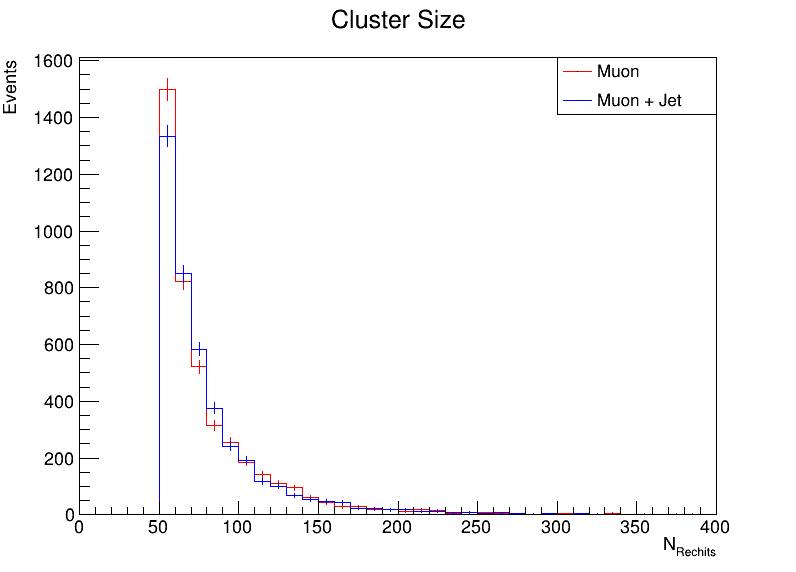

In [6]:
c = rt.TCanvas("c", "c", 800, 600)
stack_clusterSize = rt.THStack("stack","Cluster Size")
data_clusterSize = rt.TH1F("ClusterSize_Data", "Cluster Size Distribution for Data", nbinsx=40, xlow = 0, xup=800)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    if data_tree.Flag_all== 0:
        continue
    for i in range(data_tree.nCscRechitClusters):
        if (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i] and data_tree.cscRechitClusterMuonVetoPt[i]<60 and data_tree.cscRechitCluster_matchToProbeAndJet[i]==0):
            data_clusterSize.Fill(data_tree.cscRechitClusterSize[i])
data_clusterSize.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_clusterSize.Add(data_clusterSize)


MC_clusterSize = rt.TH1F("ClusterSize_MC", "Cluster Size Distribution for MC", nbinsx=40, xlow = 0, xup=400)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    if data_tree.Flag_all== 0:
        continue
    for i in range(data_tree.nCscRechitClusters):
        if (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i] and data_tree.cscRechitClusterMuonVetoPt[i]<60 and data_tree.cscRechitCluster_matchToProbeAndJet[i]!=0):

            MC_clusterSize.Fill(data_tree.cscRechitClusterSize[i])
MC_clusterSize.SetLineColor(rt.kBlue)
#MC_clusterSize.Scale(1/MC_clusterSize.GetEntries())
stack_clusterSize.Add(MC_clusterSize)

stack_clusterSize.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_clusterSize, "Muon")
legend.AddEntry(MC_clusterSize, "Muon + Jet")
legend.Draw()

stack_clusterSize.GetXaxis().SetTitle("N_{Rechits}");
stack_clusterSize.GetYaxis().SetTitle("Events");
#c.SetLogy();
c.Draw()

4235
0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: ClusterSize_Data (Potential memory leak).


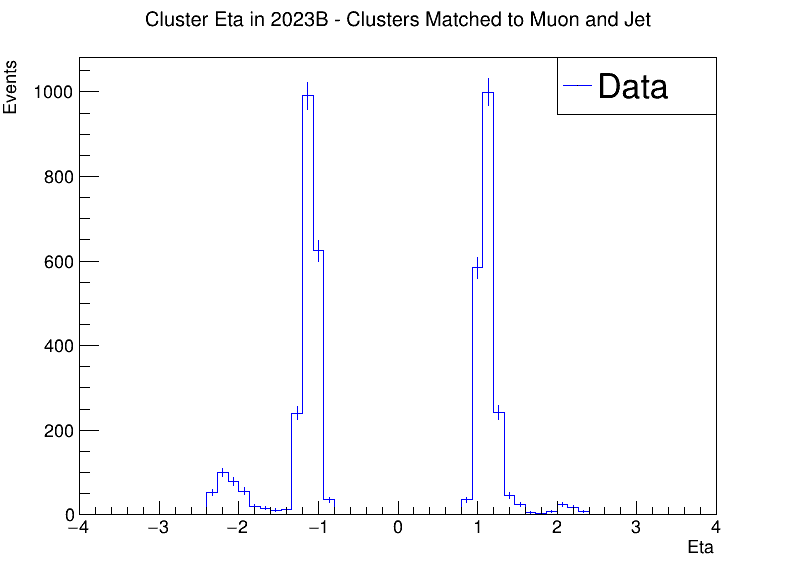

In [62]:
c = rt.TCanvas("c", "c", 800, 600)
stack_clusterSize = rt.THStack("stack","Cluster Eta in 2023B - Clusters Matched to Muon and Jet")
data_clusterSize = rt.TH1F("ClusterSize_Data", "Cluster Size Distribution for Data", nbinsx=60, xlow = -4, xup=4)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
counter=0
secondCounter=0
for idx,entry in enumerate(data_tree):
    if data_tree.Flag_all== 0:
        continue
        secondCounter+=1
    for i in range(data_tree.nCscRechitClusters):
        #if data_tree.cscRechitCluster_matchToProbeAndJet[i]==1:
        #    matchToBoth+=1
        #    continue
        if (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i] and data_tree.cscRechitClusterMuonVetoPt[i]<60 and data_tree.cscRechitCluster_matchToProbeAndJet[i]==0):
            data_clusterSize.Fill(data_tree.cscRechitClusterEta[i])
            counter+=1
data_clusterSize.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_clusterSize.Add(data_clusterSize)
print(counter)
print(secondCounter)
'''
MC_clusterSize = rt.TH1F("ClusterSize_MC", "Cluster Size Distribution for MC", nbinsx=60, xlow = -4, xup=4)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in MC_tree:
    for i in range(MC_tree.nCscRechitClusters):
        if (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            MC_clusterSize.Fill(MC_tree.cscRechitClusterEta[i], getattr(MC_tree, "weight"))
MC_clusterSize.SetLineColor(rt.kBlue)
#MC_clusterSize.Scale(1/MC_clusterSize.GetEntries())
stack_clusterSize.Add(MC_clusterSize)
'''
stack_clusterSize.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_clusterSize, "Data")
#legend.AddEntry(MC_clusterSize, "MC")
legend.Draw()

stack_clusterSize.GetXaxis().SetTitle("Eta")
stack_clusterSize.GetYaxis().SetTitle("Events")

c.Draw()

4235
0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: ClusterSize_Data (Potential memory leak).


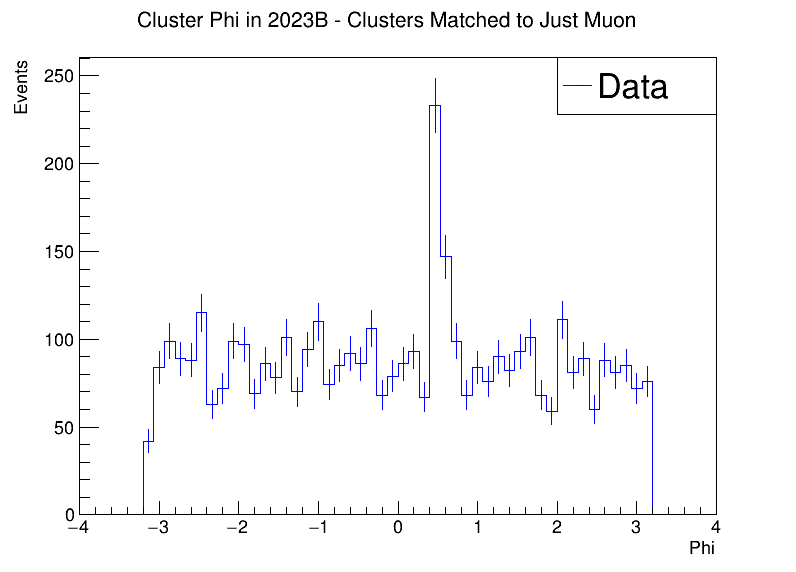

In [61]:
c = rt.TCanvas("c", "c", 800, 600)
stack_clusterSize = rt.THStack("stack","Cluster Phi in 2023B - Clusters Matched to Just Muon")
data_clusterSize = rt.TH1F("ClusterSize_Data", "Cluster Size Distribution for Data", nbinsx=60, xlow = -4, xup=4)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
counter=0
secondCounter=0
for idx,entry in enumerate(data_tree):
    if data_tree.Flag_all== 0:
        continue
        secondCounter+=1
    for i in range(data_tree.nCscRechitClusters):
        #if data_tree.cscRechitCluster_matchToProbeAndJet[i]==1:
        #    matchToBoth+=1
        #    continue
        if (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i] and data_tree.cscRechitClusterMuonVetoPt[i]<60 and data_tree.cscRechitCluster_matchToProbeAndJet[i]!=1):
            data_clusterSize.Fill(data_tree.cscRechitClusterPhi[i])
            counter+=1
data_clusterSize.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_clusterSize.Add(data_clusterSize)
print(counter)
print(secondCounter)
'''
MC_clusterSize = rt.TH1F("ClusterSize_MC", "Cluster Size Distribution for MC", nbinsx=60, xlow = -4, xup=4)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in MC_tree:
    for i in range(MC_tree.nCscRechitClusters):
        if (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            MC_clusterSize.Fill(MC_tree.cscRechitClusterEta[i], getattr(MC_tree, "weight"))
MC_clusterSize.SetLineColor(rt.kBlue)
#MC_clusterSize.Scale(1/MC_clusterSize.GetEntries())
stack_clusterSize.Add(MC_clusterSize)
'''
stack_clusterSize.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_clusterSize, "Data")
#legend.AddEntry(MC_clusterSize, "MC")
legend.Draw()

stack_clusterSize.GetXaxis().SetTitle("Phi")
stack_clusterSize.GetYaxis().SetTitle("Events")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_clusterSize = rt.THStack("stack","Cluster Time")
data_clusterSize = rt.TH1F("ClusterSize_Data", "Cluster Size Distribution for Data", nbinsx=60, xlow = -8, xup=20)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    for i in range(data_tree.nCscRechitClusters):
        if (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i]):
            data_clusterSize.Fill(data_tree.cscRechitClusterTime[i])
data_clusterSize.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_clusterSize.Add(data_clusterSize)


MC_clusterSize = rt.TH1F("ClusterSize_MC", "Cluster Size Distribution for MC", nbinsx=60, xlow = -8, xup=20)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in MC_tree:
    for i in range(MC_tree.nCscRechitClusters):
        if (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            MC_clusterSize.Fill(MC_tree.cscRechitClusterTime[i], getattr(MC_tree, "weight"))
MC_clusterSize.SetLineColor(rt.kBlue)
#MC_clusterSize.Scale(1/MC_clusterSize.GetEntries())
stack_clusterSize.Add(MC_clusterSize)

stack_clusterSize.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_clusterSize, "Data")
legend.AddEntry(MC_clusterSize, "MC")
legend.Draw()

stack_clusterSize.GetXaxis().SetTitle("Cluster Time")
#stack_clusterSize.GetYaxis().SetTitle("Fraction of Events")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_clusterSize = rt.THStack("stack","Cluster Time Spread")
data_clusterSize = rt.TH1F("ClusterSize_Data", "Cluster Size Distribution for Data", nbinsx=50, xlow = 0, xup=50)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    for i in range(data_tree.nCscRechitClusters):
        if (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i]):
            data_clusterSize.Fill(data_tree.cscRechitClusterTimeSpread[i])
data_clusterSize.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_clusterSize.Add(data_clusterSize)


MC_clusterSize = rt.TH1F("ClusterSize_MC", "Cluster Size Distribution for MC", nbinsx=50, xlow = 0, xup=50)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in MC_tree:
    for i in range(MC_tree.nCscRechitClusters):
        if (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            MC_clusterSize.Fill(MC_tree.cscRechitClusterTimeSpread[i], getattr(MC_tree, "weight"))
MC_clusterSize.SetLineColor(rt.kBlue)
#MC_clusterSize.Scale(1/MC_clusterSize.GetEntries())
stack_clusterSize.Add(MC_clusterSize)

stack_clusterSize.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_clusterSize, "Data")
legend.AddEntry(MC_clusterSize, "MC")
legend.Draw()

stack_clusterSize.GetXaxis().SetTitle("Cluster Time Spread")
stack_clusterSize.GetYaxis().SetTitle("Events")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_clusterSize = rt.THStack("stack","Weighted Cluster Time")
data_clusterSize = rt.TH1F("ClusterSize_Data", "Cluster Size Distribution for Data", nbinsx=60, xlow = -8, xup=20)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    for i in range(data_tree.nCscRechitClusters):
        if (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i]):
            data_clusterSize.Fill(data_tree.cscRechitClusterTimeWeighted[i])
data_clusterSize.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_clusterSize.Add(data_clusterSize)


MC_clusterSize = rt.TH1F("ClusterSize_MC", "Cluster Size Distribution for MC", nbinsx=60, xlow = -8, xup=20)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in MC_tree:
    for i in range(MC_tree.nCscRechitClusters):
        if (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            MC_clusterSize.Fill(MC_tree.cscRechitClusterTimeWeighted[i], getattr(MC_tree, "weight"))
MC_clusterSize.SetLineColor(rt.kBlue)
#MC_clusterSize.Scale(1/MC_clusterSize.GetEntries())
stack_clusterSize.Add(MC_clusterSize)

stack_clusterSize.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_clusterSize, "Data")
legend.AddEntry(MC_clusterSize, "MC")
legend.Draw()

stack_clusterSize.GetXaxis().SetTitle("Weighted Cluster Time")
stack_clusterSize.GetYaxis().SetTitle("Events")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
stack_clusterSize = rt.THStack("stack","Weighted Cluster Time Spread")
data_clusterSize = rt.TH1F("ClusterSize_Data", "Cluster Size Distribution for Data", nbinsx=50, xlow = 0, xup=50)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree:
    for i in range(data_tree.nCscRechitClusters):
        if (data_tree.cscRechitCluster_matchToProbeMuon[i] and data_tree.cscRechitCluster_passME1112Veto[i] and data_tree.cscRechitCluster_PassTimeVeto[i]):
            data_clusterSize.Fill(data_tree.cscRechitClusterTimeSpreadWeightedAll[i])
data_clusterSize.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_clusterSize.Add(data_clusterSize)


MC_clusterSize = rt.TH1F("ClusterSize_MC", "Cluster Size Distribution for MC", nbinsx=50, xlow = 0, xup=50)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in MC_tree:
    for i in range(MC_tree.nCscRechitClusters):
        if (MC_tree.cscRechitCluster_matchToProbeMuon[i] and MC_tree.cscRechitCluster_passME1112Veto[i] and MC_tree.cscRechitCluster_PassTimeVeto[i]):
            MC_clusterSize.Fill(MC_tree.cscRechitClusterTimeSpreadWeightedAll[i], getattr(MC_tree, "weight"))
MC_clusterSize.SetLineColor(rt.kBlue)
#MC_clusterSize.Scale(1/MC_clusterSize.GetEntries())
stack_clusterSize.Add(MC_clusterSize)

stack_clusterSize.Draw("nostack HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(data_clusterSize, "Data")
legend.AddEntry(MC_clusterSize, "MC")
legend.Draw()

stack_clusterSize.GetXaxis().SetTitle("Weighted Cluster Time Spread")
stack_clusterSize.GetYaxis().SetTitle("Events")

c.Draw()